# Extract Tags
This is a notebook to extract images from a ROS 1 bagfile, detect the aruco markers, and output a bag of AprilTag detections.

In [19]:
from rosbags.highlevel import AnyReader
from rosbags.image import message_to_cvimage
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Set up paths
bag_file_path = Path('/home/asekar/Documents/trisect_ws/src/trisect_data/2023-07-21_head_orbit/cropped.bag')
image_topic = '/trisect/stereo/left/image_rect'

In [15]:
def extract_and_display_first_image(bag_file_path, image_topic, encoding="bgr8"):
    # Open the bag file with AnyReader
    with AnyReader([bag_file_path]) as reader:
        connections = [x for x in reader.connections if x.topic == image_topic]
        
        # Loop through the messages in the topic
        for connection, timestamp, rawdata in reader.messages(connections=connections):
            # Deserialize the message
            msg = reader.deserialize(rawdata, connection.msgtype)
            
            # Print the header
            print("Header:", msg.header)
            
            # Convert ROS message to OpenCV image
            cv_image = message_to_cvimage(msg, encoding)
            
            # Display the image using matplotlib
            plt.imshow(cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
            
            # Break after displaying the first image for development
            break


Header: std_msgs__msg__Header(stamp=builtin_interfaces__msg__Time(sec=1689982588, nanosec=798638395, __msgtype__='builtin_interfaces/msg/Time'), frame_id='left', __msgtype__='std_msgs/msg/Header')


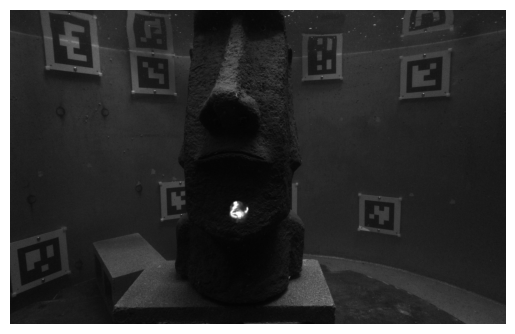

In [21]:
extract_and_display_first_image(bag_file_path, image_topic)